# Time series plots - Obs Vs Mod Data with stats

**Key steps**  
1. Import observed plot data from a .mat file.  
2. Plot timeseries observed data for three selected sites.  
3. Extract modelled data from tuflow output for the same three sites.  
4. Plot timeseries modelled data for the same three sites.  
5. Plot both obs and mod data in the same plot.  
6. Calculate stats separatrely - Three tests will be used; *Bias, RMSE, MAE, and IOA*.  
7. Add the stats to the timeseries plot.

### Import Libraries

In [20]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from tfv.extractor import FvExtractor
import tfv.xarray
import xarray as xr
import datetime as dt
from matplotlib.dates import DateFormatter
from scipy.io import loadmat
import matplotlib.dates as mdates
# define function to convert MATLAB datenum to pandas datetime
def convtime(matlab_datenum):
    return pd.to_datetime(matlab_datenum - 719529, unit='D')

## Observed Data

In [3]:
# load .mat file
TEMP_data = r'M:\UWA\A11348_Cockburn_Sound_BCG_Model\2Exectn\2Modelling\1Processing\2Postprocessed\benchmarking\Matlab_scripts\matfiles\PDSP2_data_20230129.mat'
data = loadmat(TEMP_data, simplify_cells=True)
dat = data['PDSP2_data']

Let's create data frames for each variable based on selected sites.
Below code chunk creates three dataframes for TEMP,TEMP and SALT. 

In [4]:
# create dictionary of dataframes for each variable
dfs = {}
#sites = ['NORTH', 'CENTRAL', 'SOUTH']
sites = ['NORTH', 'CENTRAL', 'SOUTH','S2', 'S3', 'R2', 'A4', 'A7', 'A10', 'A13','B4', 'B6', 'B8', 'B10', 'C4', 'C6', 'C8']
for var in ['DO', 'TEMP', 'SALT']:
    dfs[var] = pd.DataFrame()
    for site in sites:
        if var in dat[site]:
            if 'Surface' in dat[site][var]:
                df_site = pd.DataFrame({
                    'date': convtime(dat[site][var]['Surface']['date']).round('1S'),
                    'site': site,
                    'depth': 'Surface',
                    var: dat[site][var]['Surface']['data']
                })
                dfs[var] = pd.concat([dfs[var], df_site], ignore_index=True)
            if 'Bottom' in dat[site][var]:
                df_site = pd.DataFrame({
                    'date': convtime(dat[site][var]['Bottom']['date']).round('1S'),
                    'site': site,
                    'depth': 'Bottom',
                    var: dat[site][var]['Bottom']['data']
                })
                dfs[var] = pd.concat([dfs[var], df_site], ignore_index=True)


Check the head rows.
It's a good habit to check your data structure before plotting them.


In [5]:
# head of TEMP dataframe
print(dfs['TEMP'].head())

                 date   site    depth       TEMP
0 2013-01-14 12:42:53  NORTH  Surface  24.241109
1 2013-01-29 11:12:49  NORTH  Surface  23.843754
2 2013-02-13 09:39:28  NORTH  Surface  24.667787
3 2013-03-06 10:16:23  NORTH  Surface  24.096557
4 2013-03-15 08:46:30  NORTH  Surface  22.589213


In [6]:
# save dataframes for vars
df_DO = dfs['DO']
df_TEMP = dfs['TEMP']
df_SALT = dfs['SALT']

Specify start and end times.  
Feel free to match them with modlled data time periods

In [7]:
# set start and end times
start_time = '2013-01-01'
end_time = '2013-05-30'

### Plot Observed Data

Plot observed data for sites = ['NORTH', 'CENTRAL', 'SOUTH']

Variable is Temperature

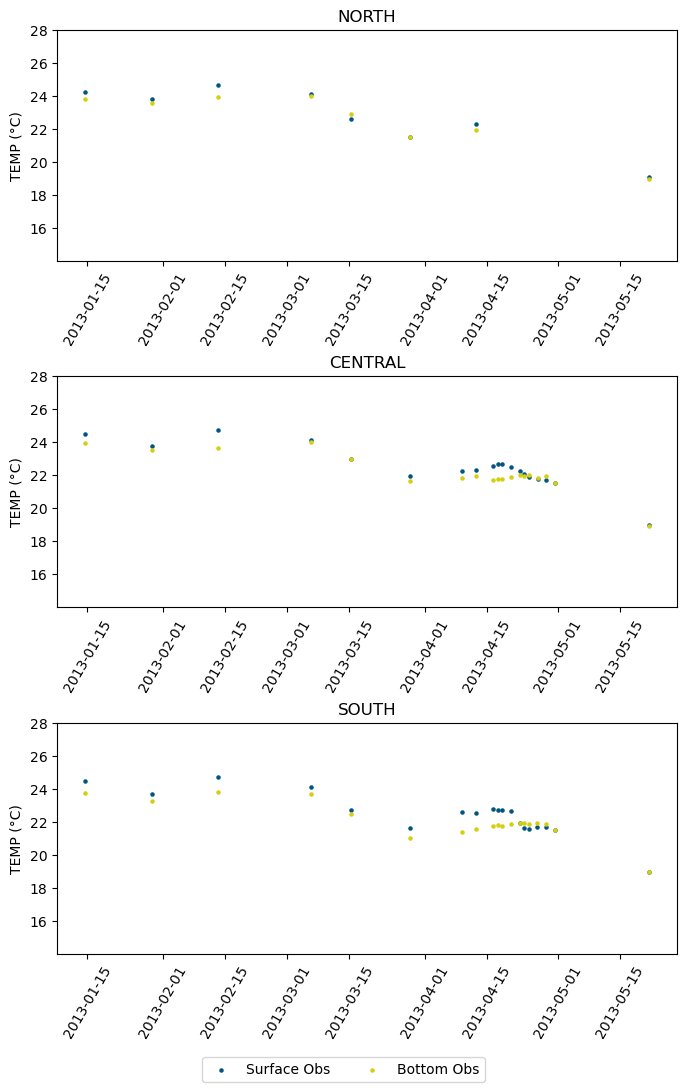

In [8]:
# filter dataframes by start and end times
df_TEMP_filtered = df_TEMP.loc[(df_TEMP['date'] >= start_time) & (df_TEMP['date'] <= end_time)]

# create subplots for each site
sites = ['NORTH', 'CENTRAL', 'SOUTH']
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# plot surface and bottom TEMP data as a scatter plot
for i, site in enumerate(sites):
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    axs[i].scatter(df_site_surface['date'], df_site_surface['TEMP'], s=5, color='#005581', label='Surface Obs')
    axs[i].scatter(df_site_bottom['date'], df_site_bottom['TEMP'], s=5, color='#D4D00F', label='Bottom Obs')
    axs[i].set_title(site)
    axs[i].set_ylim([14,28])
    axs[i].set_yticks([16,18,20,22,24,26,28])
    axs[i].set_ylabel('TEMP (°C)')
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].tick_params(axis='x', rotation=60)
    axs[i].legend().remove()

# add common legend under the last subplot
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=2)

fig.subplots_adjust(hspace=0.5)
#plt.show()
#plt.savefig('figures/TEMP/temp_sites1_time_series_obs_TEMP.png')


## Modelled data

In [9]:
ds2 = xr.open_dataset(r"K:\scratchers\A11348_Cockburn_Sound_BCG_Model\output\CSound_WQM\WQ_DO_002\CSound_20130101_20130601_WQ_DO_002.nc", decode_times=False)
ds2
ds2.tfv

<xarray.Dataset>
Dimensions:      (Time: 2857, NumLayerFaces3D: 534080, NumCells2D: 30211,
                  NumCells3D: 503869)
Coordinates:
  * Time         (Time) datetime64[ns] 2013-01-02 ... 2013-05-01
Dimensions without coordinates: NumLayerFaces3D, NumCells2D, NumCells3D
Data variables:
    ResTime      (Time) float64 2.016e+05 2.016e+05 ... 2.045e+05 2.045e+05
    layerface_Z  (Time, NumLayerFaces3D) float32 ...
    stat         (Time, NumCells2D) int32 ...
    H            (Time, NumCells2D) float32 ...
    V_x          (Time, NumCells3D) float32 ...
    V_y          (Time, NumCells3D) float32 ...
    SAL          (Time, NumCells3D) float32 ...
    TEMP         (Time, NumCells3D) float32 ...
    TRACE_1      (Time, NumCells3D) float32 ...
Attributes:
    Origin:     Created by TUFLOWFV
    Type:       Cell-centred TUFLOWFV output
    spherical:  true
    Dry depth:  0.01

In [27]:
# read location data from csv file
loc_data = r'M:\UWA\A11348_Cockburn_Sound_BCG_Model\2Exectn\2Modelling\1Processing\2Postprocessed\calibration_wq\data\PDSP2_sites.csv'
df = pd.read_csv(loc_data, delimiter=',', usecols=['X', 'Y', 'Site'])
locs = {}
for i, row in df.iterrows():
    locs[row['Site']] = (row['X'], row['Y'])

# set time range
start_time = dt.datetime(2013, 1, 2, 0, 0, 0)  # replace with your start time
end_time = dt.datetime(2013, 5, 30, 0, 0, 0)  # replace with your end time

In [28]:
ts2_top = ds2.tfv.get_timeseries(['TEMP'], locs, datum='depth', limits=(0, 1))
ts2_btm = ds2.tfv.get_timeseries(['TEMP'], locs, datum='height', limits=(0, 1))

Extracting timeseries, please wait: 100%|██████████████████████████████████████████| 2857/2857 [00:59<00:00, 47.68it/s]


In [37]:
for i, site in enumerate(['NORTH', 'CENTRAL', 'SOUTH']):
    # get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')

In [39]:
#Check the array structure
btmts2_data

<xarray.DataArray 'TEMP' (variable: 1, Time: 2857)>
array([[24.70000076, 24.69987583, 24.69982147, ..., 21.79384327,
        21.79740143, 21.80286503]])
Coordinates:
  * Time      (Time) datetime64[ns] 2013-01-02 ... 2013-05-01
    Location  <U23 'SOUTH'
    x         float64 115.7
    y         float64 -32.25
    z         float32 -19.58
  * variable  (variable) object 'TEMP'
Attributes:
    Origin:     Timeseries extracted from TUFLOWFV cell-centered output using...
    Type:       Timeseries cell from TUFLOWFV Output
    spherical:  true
    Dry depth:  0.01
    Datum:      height
    Limits:     (0, 1)
    Agg Fn:     mean

### Plot modelled data

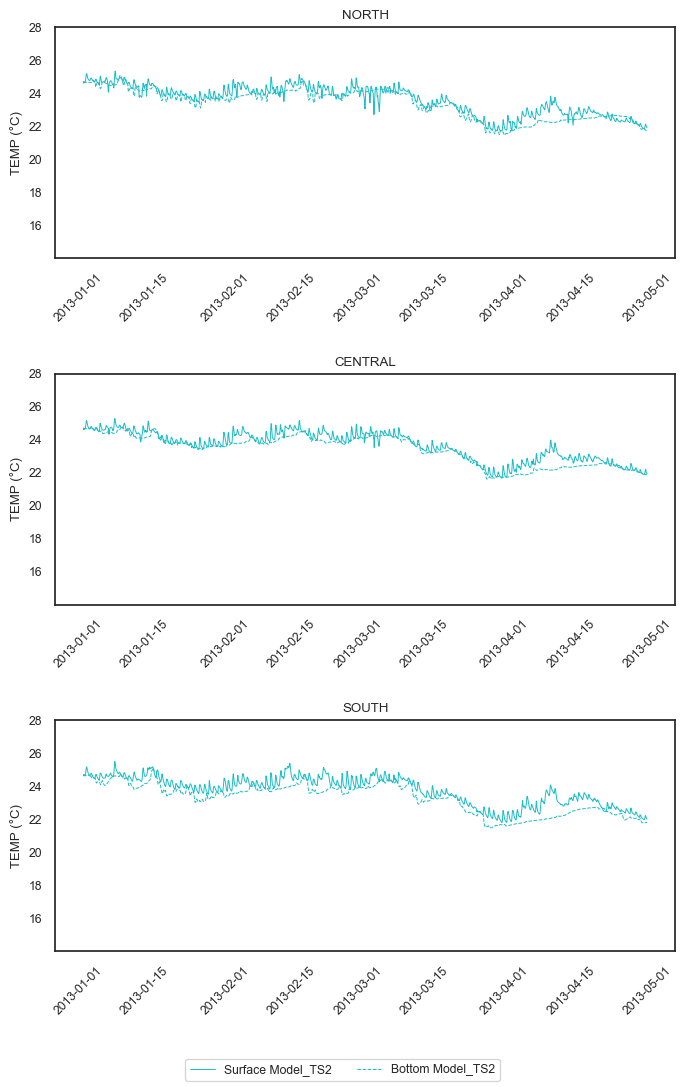

In [40]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))
for i, site in enumerate(['NORTH', 'CENTRAL', 'SOUTH']):
    # get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    axs[i].plot_date(topts2_data.Time.values, topts2_data.values[0], fmt='-', color='#1ABDC9',label='Surface Model_TS2',linewidth=0.7)
    axs[i].plot_date(btmts2_data.Time.values, btmts2_data.values[0], fmt='--', color='#1ABDC9',label='Bottom Model_TS2',linewidth=0.7)
    # set y-axis limits and ticks, and add y-axis label
    axs[i].set_ylim([14,28])
    axs[i].set_yticks([16,18,20,22,24,26,28])
    axs[i].set_ylabel('TEMP (°C)')
    
    # set subplot title and x-axis label to date format
    axs[i].set_title(site)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].tick_params(axis='x', rotation=45)
    
# add common legend under the last subplot
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=3)

# adjust subplot spacing and save the figure
fig.subplots_adjust(hspace=0.5)

## Plot Mod and Obs data in one plot

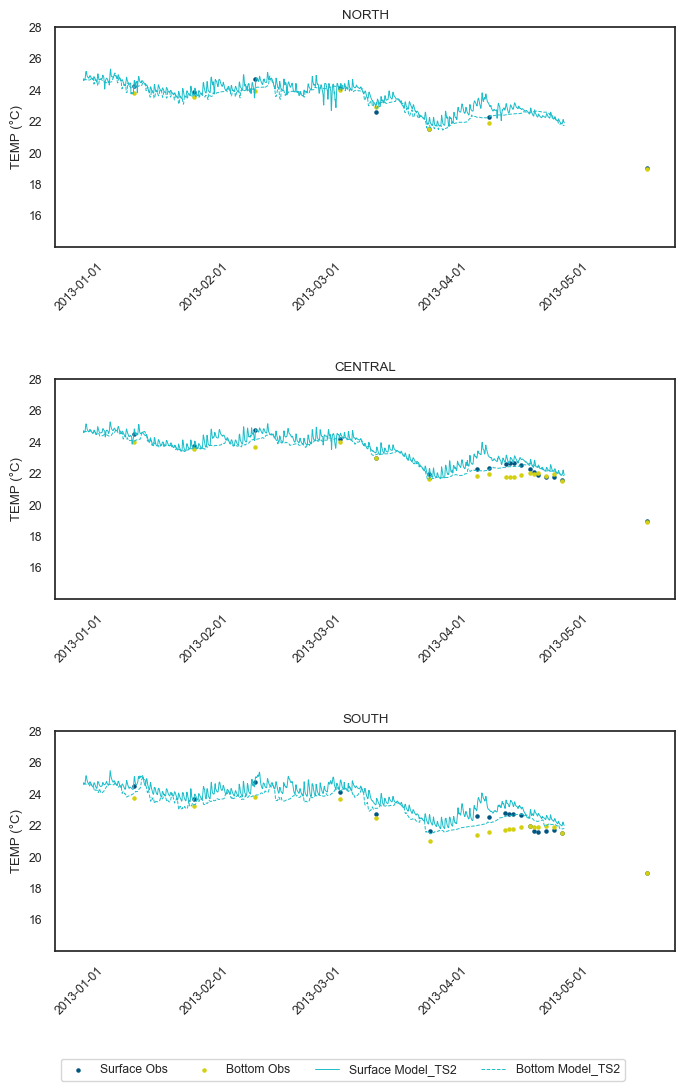

In [41]:
# loop through the site lists and create the subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# plot observed data
for i, site in enumerate(['NORTH', 'CENTRAL', 'SOUTH']):
    # filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # plot observed data as scatter plot
    axs[i].scatter(df_site_surface['date'], df_site_surface['TEMP'], s=5, color='#005581', label='Surface Obs')
    axs[i].scatter(df_site_bottom['date'], df_site_bottom['TEMP'], s=5, color='#D4D00F', label='Bottom Obs')

    # get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP') 
   
       
  # plot modelled data
    axs[i].plot_date(topts2_data.Time.values, topts2_data.values[0], fmt='-', color='#1ABDC9',label='Surface Model_TS2',linewidth=0.7)
    axs[i].plot_date(btmts2_data.Time.values, btmts2_data.values[0], fmt='--', color='#1ABDC9',label='Bottom Model_TS2',linewidth=0.7)
       
    # set y-axis limits and ticks, and add y-axis label
    axs[i].set_ylim([14,28])
    axs[i].set_yticks([16,18,20,22,24,26,28])
    axs[i].set_ylabel('TEMP (°C)')
    
    # set subplot title and x-axis label to date format
    axs[i].set_title(site)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].tick_params(axis='x', rotation=45)
    
# add common legend under the last subplot
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)

# adjust subplot spacing and save the figure
fig.subplots_adjust(hspace=0.6)
#plt.savefig('figures/TEMP/temp_sites1_time_series_obs_vs_mod_TS11.jpeg')



# Calculate stats

## BIAS  

The bias measures the average difference between the modeled and observed values. It provides an indication of the systematic over- or underestimation of the model compared to the observations. The bias is calculated as the mean of the differences between the modeled and observed values.

**Bias = mean(modeled values - observed values)**

Step 1; Calculate mean values for observed data 

In [42]:
surface_mean_per_site = {}
bottom_mean_per_site = {}

# Calculate mean values for surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # Calculate mean values for surface and bottom data
    surface_mean = df_site_surface['TEMP'].mean()
    bottom_mean = df_site_bottom['TEMP'].mean()
    
    # Store mean values in dictionaries
    surface_mean_per_site[site] = surface_mean
    bottom_mean_per_site[site] = bottom_mean
    
    # Print mean values for observed data
    print(f"Observed Mean at {site} (Surface): {surface_mean:.2f}")
    print(f"Observed Mean at {site} (Bottom): {bottom_mean:.2f}")


Observed Mean at NORTH (Surface): 22.79
Observed Mean at NORTH (Bottom): 22.58
Observed Mean at CENTRAL (Surface): 22.51
Observed Mean at CENTRAL (Bottom): 22.16
Observed Mean at SOUTH (Surface): 22.45
Observed Mean at SOUTH (Bottom): 22.01


Step 2; Calculate mean values for modelled data 

In [43]:
surface_model_mean_per_site = {}
bottom_model_mean_per_site = {}

# Calculate mean values for modelled surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')

    # Calculate mean values for modelled surface and bottom data
    surface_model_mean = topts2_data.mean().item()
    bottom_model_mean = btmts2_data.mean().item()

    # Store mean values in dictionaries
    surface_model_mean_per_site[site] = surface_model_mean
    bottom_model_mean_per_site[site] = bottom_model_mean

    # Print mean values for modelled data
    print(f"Modelled Mean at {site} (Surface): {surface_model_mean:.2f}")
    print(f"Modelled Mean at {site} (Bottom): {bottom_model_mean:.2f}")


Modelled Mean at NORTH (Surface): 23.60
Modelled Mean at NORTH (Bottom): 23.37
Modelled Mean at CENTRAL (Surface): 23.64
Modelled Mean at CENTRAL (Bottom): 23.38
Modelled Mean at SOUTH (Surface): 23.75
Modelled Mean at SOUTH (Bottom): 23.27


Step 3; Calculate BIAS

In [44]:
surface_bias_per_site = {}
bottom_bias_per_site = {}

# Calculate bias for surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Calculate bias for surface data
    surface_bias = surface_model_mean_per_site[site] - surface_mean_per_site[site]
    surface_bias_per_site[site] = surface_bias

    # Calculate bias for bottom data
    bottom_bias = bottom_model_mean_per_site[site] - bottom_mean_per_site[site]
    bottom_bias_per_site[site] = bottom_bias

    # Print bias values
    print(f"Bias at {site} (Surface): {surface_bias:.2f}")
    print(f"Bias at {site} (Bottom): {bottom_bias:.2f}")


Bias at NORTH (Surface): 0.81
Bias at NORTH (Bottom): 0.79
Bias at CENTRAL (Surface): 1.14
Bias at CENTRAL (Bottom): 1.22
Bias at SOUTH (Surface): 1.30
Bias at SOUTH (Bottom): 1.26


## Root Mean Square Error (RMSE)   

RMSE measures the average magnitude of the differences between the modeled and observed values. It quantifies the overall error or discrepancy between the model and the observations, considering both the magnitude and direction of the differences. The RMSE is calculated as the square root of the mean squared differences between the modeled and observed values.

**RMSE = sqrt(mean((modeled values - observed values)^2))**

Calculate RMSE

In [46]:
from sklearn.metrics import mean_squared_error

surface_rmse_per_site = {}
bottom_rmse_per_site = {}

# Calculate RMSE for surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # Convert mean values to numpy arrays
    surface_mean = np.array(surface_model_mean_per_site[site])
    bottom_mean = np.array(bottom_model_mean_per_site[site])

    # Calculate RMSE for surface data
    surface_obs = df_site_surface['TEMP'].values.astype(float)
    surface_rmse = np.sqrt(mean_squared_error(surface_obs, np.full(surface_obs.shape, surface_mean)))
    surface_rmse_per_site[site] = surface_rmse

    # Calculate RMSE for bottom data
    bottom_obs = df_site_bottom['TEMP'].values.astype(float)
    bottom_rmse = np.sqrt(mean_squared_error(bottom_obs, np.full(bottom_obs.shape, bottom_mean)))
    bottom_rmse_per_site[site] = bottom_rmse

    # Print RMSE values
    print(f"RMSE at {site} (Surface): {surface_rmse:.2f}")
    print(f"RMSE at {site} (Bottom): {bottom_rmse:.2f}")


RMSE at NORTH (Surface): 1.92
RMSE at NORTH (Bottom): 1.81
RMSE at CENTRAL (Surface): 1.68
RMSE at CENTRAL (Bottom): 1.65
RMSE at SOUTH (Surface): 1.82
RMSE at SOUTH (Bottom): 1.66


## Mean Absolute Error (MAE)  

MAE measures the average magnitude of the differences between the modeled and observed values, ignoring the direction of the differences. It provides a measure of the average absolute deviation of the model from the observations. The MAE is calculated as the mean of the absolute differences between the modeled and observed values.

**MAE = mean(abs(modeled values - observed values))**


In [ ]:
Calculate MAE

In [47]:
surface_mae_per_site = {}
bottom_mae_per_site = {}

# Calculate MAE for surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # Convert mean values to numpy arrays
    surface_mean = np.array(surface_mean_per_site[site])
    bottom_mean = np.array(bottom_mean_per_site[site])
    
    # Calculate MAE for surface data
    surface_obs = df_site_surface['TEMP'].values.astype(float)
    surface_mae = mean_absolute_error(surface_obs, np.full(surface_obs.shape, surface_mean))
    surface_mae_per_site[site] = surface_mae

    # Calculate MAE for bottom data
    bottom_obs = df_site_bottom['TEMP'].values.astype(float)
    bottom_mae = mean_absolute_error(bottom_obs, np.full(bottom_obs.shape, bottom_mean))
    bottom_mae_per_site[site] = bottom_mae

    # Print MAE values
    print(f"MAE at {site} (Surface): {surface_mae:.2f}")
    print(f"MAE at {site} (Bottom): {bottom_mae:.2f}")


MAE at NORTH (Surface): 1.42
MAE at NORTH (Bottom): 1.33
MAE at CENTRAL (Surface): 0.85
MAE at CENTRAL (Bottom): 0.78
MAE at SOUTH (Surface): 0.94
MAE at SOUTH (Bottom): 0.73


## Index of Agreement (IOA)  

IOA is a statistical measure that quantifies the agreement between the modeled and observed values, taking into account both the bias and the variability of the data. It ranges from 0 to 1, with values closer to 1 indicating a better agreement between the model and the observations. IOA is calculated using the formula:

**IOA = 1 - (sum((modeled values - observed values)$^2$) / sum((|modeled values - mean(observed values)| + |observed values - mean(observed values)|)$^2$))**

The numerator represents the squared differences between the modeled and observed values, while the denominator represents the sum of the squared differences between the modeled values and the mean observed value, and the squared differences between the observed values and their mean.

In [ ]:
Calculate IOA

In [48]:
surface_ioa_per_site = {}
bottom_ioa_per_site = {}

# Calculate IOA for surface and bottom data at each site
for site in ['NORTH', 'CENTRAL', 'SOUTH']:
    # Filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]

    # Convert mean values to numpy arrays
    surface_mean = np.array(surface_model_mean_per_site[site])
    bottom_mean = np.array(bottom_model_mean_per_site[site])

    # Calculate IOA for surface data
    surface_obs = df_site_surface['TEMP'].values.astype(float)
    numerator = np.sum((surface_mean - surface_obs) ** 2)
    denominator = np.sum((np.abs(surface_mean - np.mean(surface_obs)) + np.abs(surface_obs - np.mean(surface_obs))) ** 2)
    surface_ioa = 1 - (numerator / denominator)
    surface_ioa_per_site[site] = surface_ioa

    # Calculate IOA for bottom data
    bottom_obs = df_site_bottom['TEMP'].values.astype(float)
    numerator = np.sum((bottom_mean - bottom_obs) ** 2)
    denominator = np.sum((np.abs(bottom_mean - np.mean(bottom_obs)) + np.abs(bottom_obs - np.mean(bottom_obs))) ** 2)
    bottom_ioa = 1 - (numerator / denominator)
    bottom_ioa_per_site[site] = bottom_ioa

    # Print IOA values
    print(f"IOA at {site} (Surface): {surface_ioa:.2f}")
    print(f"IOA at {site} (Bottom): {bottom_ioa:.2f}")


IOA at NORTH (Surface): 0.38
IOA at NORTH (Bottom): 0.39
IOA at CENTRAL (Surface): 0.41
IOA at CENTRAL (Bottom): 0.41
IOA at SOUTH (Surface): 0.43
IOA at SOUTH (Bottom): 0.40


### Add BIAS, RMSE, MAE and IOA stats to the figure

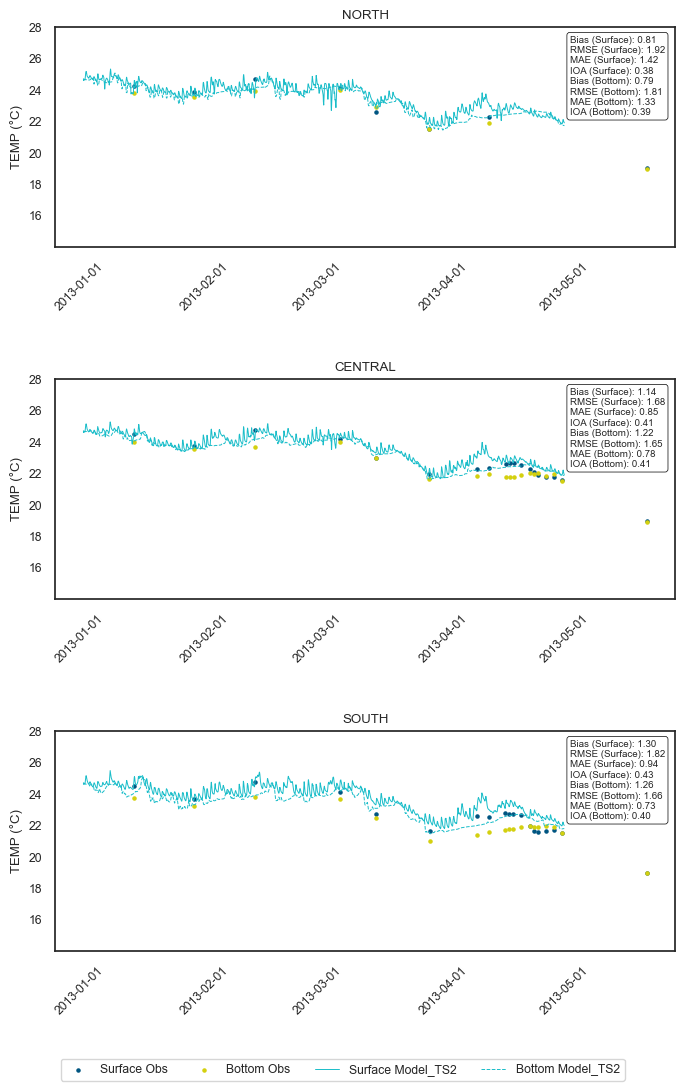

In [52]:
# loop through the site lists and create the subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 12))

# plot observed data
for i, site in enumerate(['NORTH', 'CENTRAL', 'SOUTH']):
    # filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # plot observed data as scatter plot
    axs[i].scatter(df_site_surface['date'], df_site_surface['TEMP'], s=5, color='#005581', label='Surface Obs')
    axs[i].scatter(df_site_bottom['date'], df_site_bottom['TEMP'], s=5, color='#D4D00F', label='Bottom Obs')

    # get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP') 

    # Calculate bias for surface and bottom data
    surface_bias = surface_model_mean_per_site[site] - surface_mean_per_site[site]
    bottom_bias = bottom_model_mean_per_site[site] - bottom_mean_per_site[site]

    # Calculate RMSE for surface and bottom data
    surface_rmse = surface_rmse_per_site[site]
    bottom_rmse = bottom_rmse_per_site[site]

    # Calculate MAE for surface and bottom data
    surface_mae = surface_mae_per_site[site]
    bottom_mae = bottom_mae_per_site[site]
    
    # Calculate IOA for surface and bottom data
    surface_ioa = surface_ioa_per_site[site]
    bottom_ioa = bottom_ioa_per_site[site]

    # plot modelled data
    axs[i].plot_date(topts2_data.Time.values, topts2_data.values[0], fmt='-', color='#1ABDC9',label='Surface Model_TS2',linewidth=0.7)
    axs[i].plot_date(btmts2_data.Time.values, btmts2_data.values[0], fmt='--', color='#1ABDC9',label='Bottom Model_TS2',linewidth=0.7)

    # Add a box with all the labels
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=0.5)
    label_text = f"Bias (Surface): {surface_bias:.2f}\nRMSE (Surface): {surface_rmse:.2f}\nMAE (Surface): {surface_mae:.2f}\nIOA (Surface): {surface_ioa:.2f}\nBias (Bottom): {bottom_bias:.2f}\nRMSE (Bottom): {bottom_rmse:.2f}\nMAE (Bottom): {bottom_mae:.2f}\nIOA (Bottom): {bottom_ioa:.2f}"
    axs[i].text(0.83, 0.6, label_text, transform=axs[i].transAxes, fontsize=7, bbox=bbox_props)
  
    # set y-axis limits and ticks, and add y-axis label
    axs[i].set_ylim([14, 28])
    axs[i].set_yticks([16, 18, 20, 22, 24, 26, 28])
    axs[i].set_ylabel('TEMP (°C)')
    
    # set subplot title and x-axis label to date format
    axs[i].set_title(site)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].tick_params(axis='x', rotation=45)
    
# add common legend under the last subplot
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)

# adjust subplot spacing and save the figure
fig.subplots_adjust(hspace=0.6)
#plt.savefig('figures/TEMP/temp_sites1_time_series_obs_vs_mod_TS11.jpeg')


## Tidy up the figure    
Move the stat table outside the plot area, add a title to the stat box

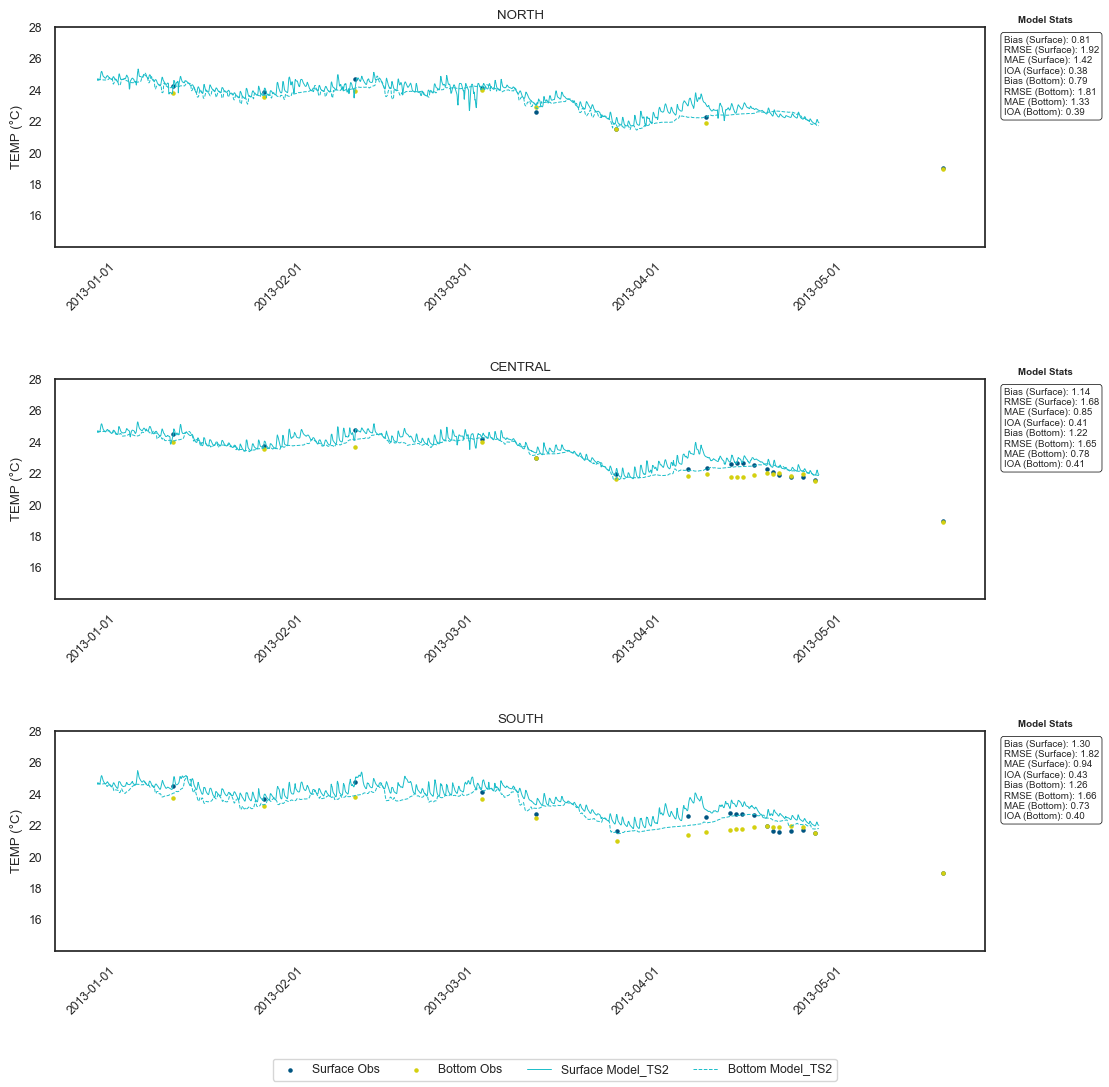

In [51]:
# loop through the site lists and create the subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

# plot observed data
for i, site in enumerate(['NORTH', 'CENTRAL', 'SOUTH']):
    # filter dataframes by site and depth
    df_site_surface = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Surface')]
    df_site_bottom = df_TEMP_filtered.loc[(df_TEMP_filtered['site'] == site) & (df_TEMP_filtered['depth'] == 'Bottom')]
    
    # plot observed data as scatter plot
    axs[i].scatter(df_site_surface['date'], df_site_surface['TEMP'], s=5, color='#005581', label='Surface Obs')
    axs[i].scatter(df_site_bottom['date'], df_site_bottom['TEMP'], s=5, color='#D4D00F', label='Bottom Obs')

    # get the top and bottom data for the current site
    btmts2_data = ts2_btm.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP')
    topts2_data = ts2_top.sel(Location=site).sel(Time=slice(start_time, end_time)).to_array(name='TEMP') 

    # Calculate bias for surface and bottom data
    surface_bias = surface_model_mean_per_site[site] - surface_mean_per_site[site]
    bottom_bias = bottom_model_mean_per_site[site] - bottom_mean_per_site[site]

    # Calculate RMSE for surface and bottom data
    surface_rmse = surface_rmse_per_site[site]
    bottom_rmse = bottom_rmse_per_site[site]

    # Calculate MAE for surface and bottom data
    surface_mae = surface_mae_per_site[site]
    bottom_mae = bottom_mae_per_site[site]
    
    # Calculate IOA for surface and bottom data
    surface_ioa = surface_ioa_per_site[site]
    bottom_ioa = bottom_ioa_per_site[site]

    # plot modelled data
    axs[i].plot_date(topts2_data.Time.values, topts2_data.values[0], fmt='-', color='#1ABDC9',label='Surface Model_TS2',linewidth=0.7)
    axs[i].plot_date(btmts2_data.Time.values, btmts2_data.values[0], fmt='--', color='#1ABDC9',label='Bottom Model_TS2',linewidth=0.7)

    # Add a box with all the labels
    bbox_props = dict(boxstyle='round', facecolor='white', edgecolor='black', linewidth=0.5)
    label_text = f"Bias (Surface): {surface_bias:.2f}\nRMSE (Surface): {surface_rmse:.2f}\nMAE (Surface): {surface_mae:.2f}\nIOA (Surface): {surface_ioa:.2f}\nBias (Bottom): {bottom_bias:.2f}\nRMSE (Bottom): {bottom_rmse:.2f}\nMAE (Bottom): {bottom_mae:.2f}\nIOA (Bottom): {bottom_ioa:.2f}"
    axs[i].text(1.02, 0.6, label_text, transform=axs[i].transAxes, fontsize=7, bbox=bbox_props)
  
    # set y-axis limits and ticks, and add y-axis label
    axs[i].set_ylim([14, 28])
    axs[i].set_yticks([16, 18, 20, 22, 24, 26, 28])
    axs[i].set_ylabel('TEMP (°C)')
    
    # set subplot title and x-axis label to date format
    axs[i].set_title(site)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    axs[i].tick_params(axis='x', rotation=45)

    # Add a title to the stat label box
    axs[i].text(1.065, 1.02, "Model Stats", fontsize=7, fontweight='bold', transform=axs[i].transAxes, ha='center')

# add common legend under the last subplot
handles, labels = axs[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=4)

# adjust subplot spacing and save the figure
fig.subplots_adjust(hspace=0.6)
plt.savefig('figures/TEMP/temp_sites1_time_series_obs_vs_mod_TS2_with_stats.jpeg')
